In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
data = pd.read_csv("onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [10]:
print(data.info)

<bound method DataFrame.info of      Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773   

# online food order decisions based on the age of the customer

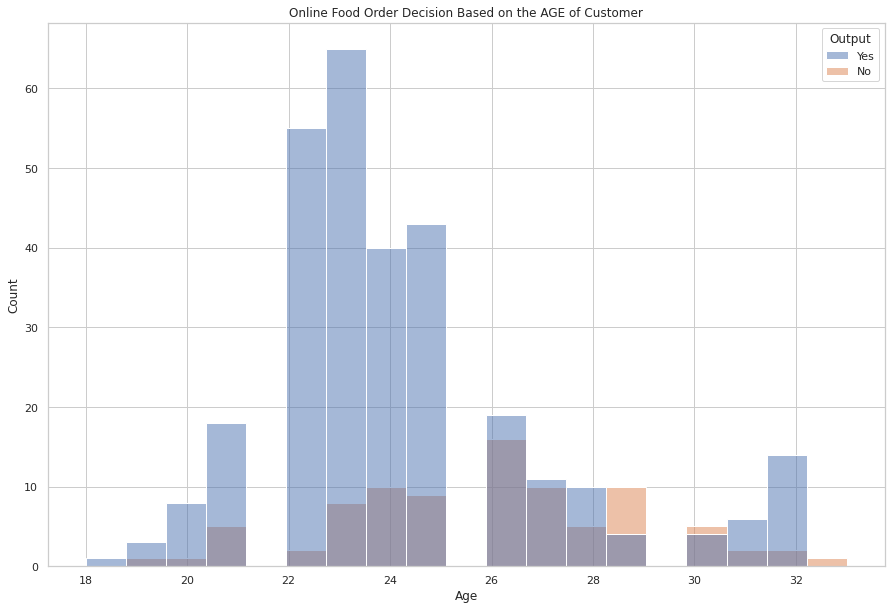

In [12]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decision Based on the AGE of Customer")
sns.histplot(x="Age",hue="Output",data=data)
plt.show()

#  online food order decisions based on the size of the family of the customer

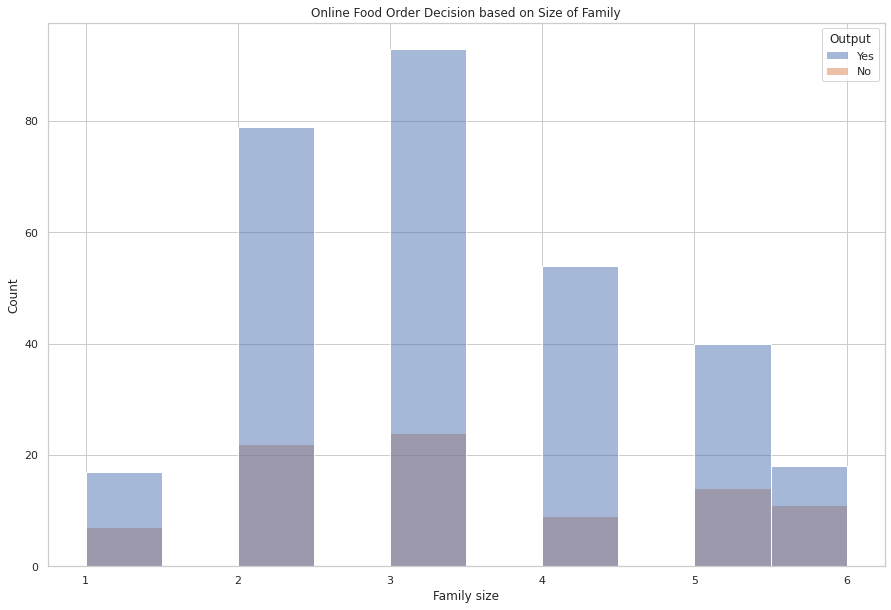

In [14]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decision based on Size of Family")
sns.histplot(x="Family size",hue="Output",data=data)
plt.show()

# dataset of ALL the customers who ordered the food again

In [20]:
buying_again_data = data[data["Output"]=='Yes']
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# let’s have a look at the gender column of data who orders food more

Male      175
Female    126
Name: Gender, dtype: int64


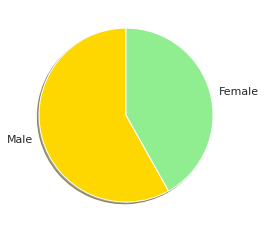

In [34]:
gender = buying_again_data['Gender'].value_counts()
print(gender)
labels = gender.index
count = gender.values
mycolors = ['gold','lightgreen']
plt.pie(count, labels = labels, startangle = 90,shadow=True,colors=mycolors)
plt.show()


# let’s have a look at the marital status of the customers who ordered again

Single               229
Married               66
Prefer not to say      6
Name: Marital Status, dtype: int64


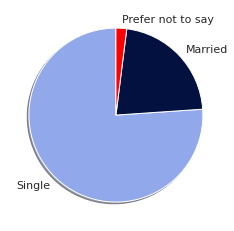

In [48]:
marital = buying_again_data['Marital Status'].value_counts()
print(marital)
labels = marital.index
count = marital.values
mycolors= ["#91a8eb","#021140","red"]
plt.pie(count,labels=labels,shadow=True,startangle = 90,colors=mycolors)
plt.show()

# let’s have a look at what’s the income group of the customers who ordered the food again

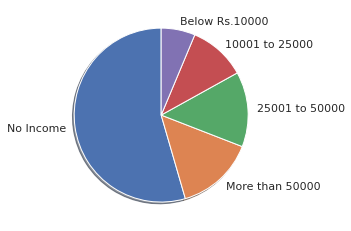

In [51]:
income = buying_again_data['Monthly Income'].value_counts()
income
labels = income.index
count = income.values
plt.pie(count,labels=labels,startangle=90,shadow=True)
plt.show()

# convert all the categorical features into numerical values

In [52]:
data['Gender'] = data['Gender'].map({"Male":1,"Female":2})
data['Marital Status'] = data['Marital Status'].map({"Married":2,"Single":1,"Prefer not to say":0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 50000, 
                                                     "More than 50000": 50001, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       2               1           1               0   
1   24       2               1           1           10000   
2   22       1               1           1           10000   
3   22       2               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

# splitting the data into training and test sets

In [53]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Age","Gender","Marital Status","Occupation","Monthly Income","Educational Qualifications","Family size","Pin code","Feedback"]])
y = np.array(data[["Output"]])


# machine learning model to predict whether a customer will order again or not

In [54]:
from sklearn.ensemble import RandomForestClassifier
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.10,random_state=42)
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.9487179487179487


/tmp/ipykernel_45366/2176352135.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)


# a form to input the data of the customer and predict whether the customer will order the food again or not:

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a,b,c,d,e,f,g,h,i]])
print("Customer will order again:",model.predict(features))